# 十分钟入门pandas

In [1]:
#coding:utf8
%matplotlib inline

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,-0.389713
2013-01-05,1.679381,1.468609,0.360648,-0.240850
2013-01-06,0.567867,0.235352,1.117395,-0.604326


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


可以看到各列的数据类型为：

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,-0.389713
2013-01-05,1.679381,1.468609,0.360648,-0.240850


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,1.260276,1.000297,0.809801,-0.389713
2013-01-05,1.679381,1.468609,0.360648,-0.240850
2013-01-06,0.567867,0.235352,1.117395,-0.604326


显示索引、列名以及底层的numpy数据

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-0.90052384, -0.30251543, -0.54176245,  1.56291588],
       [-0.8841172 , -0.65074073,  0.21734508,  0.26891483],
       [ 0.22082238,  0.79052719,  0.69217223,  0.72344092],
       [ 1.2602764 ,  1.0002968 ,  0.80980141, -0.38971272],
       [ 1.67938067,  1.46860938,  0.36064787, -0.24084994],
       [ 0.56786654,  0.23535244,  1.117395  , -0.60432593]])

describe()能对数据做一个快速统计汇总

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.323951,0.423588,0.442600,0.220064
std,1.071708,0.809463,0.579465,0.815219
min,-0.900524,-0.650741,-0.541762,-0.604326
25%,-0.607882,-0.168048,0.253171,-0.352497
50%,0.394344,0.512940,0.526410,0.014032
75%,1.087174,0.947854,0.780394,0.609809
max,1.679381,1.468609,1.117395,1.562916


对数据做转置：

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.900524,-0.884117,0.220822,1.260276,1.679381,0.567867
B,-0.302515,-0.650741,0.790527,1.000297,1.468609,0.235352
C,-0.541762,0.217345,0.692172,0.809801,0.360648,1.117395
D,1.562916,0.268915,0.723441,-0.389713,-0.240850,-0.604326


按轴进行排序：

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.562916,-0.541762,-0.302515,-0.900524
2013-01-02,0.268915,0.217345,-0.650741,-0.884117
2013-01-03,0.723441,0.692172,0.790527,0.220822
2013-01-04,-0.389713,0.809801,1.000297,1.260276
2013-01-05,-0.240850,0.360648,1.468609,1.679381
2013-01-06,-0.604326,1.117395,0.235352,0.567867


按值进行排序 :

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916
2013-01-06,0.567867,0.235352,1.117395,-0.604326
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,-0.389713
2013-01-05,1.679381,1.468609,0.360648,-0.240850


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [17]:
df['A']

2013-01-01   -0.900524
2013-01-02   -0.884117
2013-01-03    0.220822
2013-01-04    1.260276
2013-01-05    1.679381
2013-01-06    0.567867
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,-0.389713


## 通过标签选取

通过标签进行交叉选取：

In [20]:
df.loc[dates[0]]

A   -0.900524
B   -0.302515
C   -0.541762
D    1.562916
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.900524,-0.302515
2013-01-02,-0.884117,-0.650741
2013-01-03,0.220822,0.790527
2013-01-04,1.260276,1.000297
2013-01-05,1.679381,1.468609
2013-01-06,0.567867,0.235352


In [22]:
df.loc[:,['A','B']][:3]

,A,B
2013-01-01,-0.900524,-0.302515
2013-01-02,-0.884117,-0.650741
2013-01-03,0.220822,0.790527


进行标签切片，包含两个端点

In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.884117,-0.650741
2013-01-03,0.220822,0.790527
2013-01-04,1.260276,1.000297


对于返回的对象进行降维处理

In [24]:
df.loc['20130102',['A','B']]

A   -0.884117
B   -0.650741
Name: 2013-01-02 00:00:00, dtype: float64

获取一个标量

In [25]:
df.loc[dates[0],'A']

-0.9005238449408509

快速获取标量（与上面的方法等价）

In [26]:
df.at[dates[0],'A']

-0.9005238449408509

## 通过位置选取

通过传递整型的位置进行选取

In [27]:
df.iloc[3]

A    1.260276
B    1.000297
C    0.809801
D   -0.389713
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取，与python/numpy形式相同

In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.260276,1.000297
2013-01-05,1.679381,1.468609


只对行进行切片

In [29]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.884117,-0.650741,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441


只对列进行切片

In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.302515,-0.541762
2013-01-02,-0.650741,0.217345
2013-01-03,0.790527,0.692172
2013-01-04,1.000297,0.809801
2013-01-05,1.468609,0.360648
2013-01-06,0.235352,1.117395


只获取某个值

In [31]:
df.iloc[1,1]

-0.6507407272837356

快速获取某个值（与上面的方法等价）

In [32]:
df.iat[1,1]

-0.6507407272837356

## 布尔索引

用某列的值来选取数据

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,-0.389713
2013-01-05,1.679381,1.468609,0.360648,-0.240850
2013-01-06,0.567867,0.235352,1.117395,-0.604326


用**where**操作来选取数据

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,1.562916
2013-01-02,NaN,NaN,0.217345,0.268915
2013-01-03,0.220822,0.790527,0.692172,0.723441
2013-01-04,1.260276,1.000297,0.809801,NaN
2013-01-05,1.679381,1.468609,0.360648,NaN
2013-01-06,0.567867,0.235352,1.117395,NaN


用**isin()**方法来过滤数据

In [35]:
df2 = df.copy()

In [36]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916,one
2013-01-02,-0.884117,-0.650741,0.217345,0.268915,one
2013-01-03,0.220822,0.790527,0.692172,0.723441,two
2013-01-04,1.260276,1.000297,0.809801,-0.389713,three
2013-01-05,1.679381,1.468609,0.360648,-0.240850,four
2013-01-06,0.567867,0.235352,1.117395,-0.604326,three


In [37]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.220822,0.790527,0.692172,0.723441,two
2013-01-05,1.679381,1.468609,0.360648,-0.240850,four


## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.900524,-0.302515,-0.541762,1.562916,NaN
2013-01-02,-0.884117,-0.650741,0.217345,0.268915,1.0
2013-01-03,0.220822,0.790527,0.692172,0.723441,2.0
2013-01-04,1.260276,1.000297,0.809801,-0.389713,3.0
2013-01-05,1.679381,1.468609,0.360648,-0.240850,4.0
2013-01-06,0.567867,0.235352,1.117395,-0.604326,5.0


通过标签赋值

In [40]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.302515,-0.541762,1.562916,NaN
2013-01-02,-0.884117,-0.650741,0.217345,0.268915,1.0
2013-01-03,0.220822,0.790527,0.692172,0.723441,2.0
2013-01-04,1.260276,1.000297,0.809801,-0.389713,3.0
2013-01-05,1.679381,1.468609,0.360648,-0.240850,4.0
2013-01-06,0.567867,0.235352,1.117395,-0.604326,5.0


通过位置赋值

In [41]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.541762,1.562916,NaN
2013-01-02,-0.884117,-0.650741,0.217345,0.268915,1.0
2013-01-03,0.220822,0.790527,0.692172,0.723441,2.0
2013-01-04,1.260276,1.000297,0.809801,-0.389713,3.0
2013-01-05,1.679381,1.468609,0.360648,-0.240850,4.0
2013-01-06,0.567867,0.235352,1.117395,-0.604326,5.0


通过传递numpy array赋值

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.541762,5,NaN
2013-01-02,-0.884117,-0.650741,0.217345,5,1.0
2013-01-03,0.220822,0.790527,0.692172,5,2.0
2013-01-04,1.260276,1.000297,0.809801,5,3.0
2013-01-05,1.679381,1.468609,0.360648,5,4.0
2013-01-06,0.567867,0.235352,1.117395,5,5.0


通过**where**操作来赋值

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.541762,-5,NaN
2013-01-02,-0.884117,-0.650741,-0.217345,-5,-1.0
2013-01-03,-0.220822,-0.790527,-0.692172,-5,-2.0
2013-01-04,-1.260276,-1.000297,-0.809801,-5,-3.0
2013-01-05,-1.679381,-1.468609,-0.360648,-5,-4.0
2013-01-06,-0.567867,-0.235352,-1.117395,-5,-5.0


# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.541762,5,NaN,1.0
2013-01-02,-0.884117,-0.650741,0.217345,5,1.0,1.0
2013-01-03,0.220822,0.790527,0.692172,5,2.0,NaN
2013-01-04,1.260276,1.000297,0.809801,5,3.0,NaN


剔除所有包含缺失值的行数据

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.884117,-0.650741,0.217345,5,1.0,1.0


填充缺失值

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.541762,5,5.0,1.0
2013-01-02,-0.884117,-0.650741,0.217345,5,1.0,1.0
2013-01-03,0.220822,0.790527,0.692172,5,2.0,5.0
2013-01-04,1.260276,1.000297,0.809801,5,3.0,5.0


获取值是否为**nan**的布尔标记

In [47]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [48]:
df.mean()

A    0.474038
B    0.474008
C    0.442600
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [49]:
df.mean(1)

2013-01-01    1.114559
2013-01-02    0.936497
2013-01-03    1.740704
2013-01-04    2.214075
2013-01-05    2.501728
2013-01-06    2.384123
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.779178,-0.209473,-0.307828,4.0,1.0
2013-01-04,-1.739724,-1.999703,-2.190199,2.0,0.0
2013-01-05,-3.320619,-3.531391,-4.639352,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数作用

通过apply()对函数作用

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.541762,5,NaN
2013-01-02,-0.884117,-0.650741,-0.324417,10,1.0
2013-01-03,-0.663295,0.139786,0.367755,15,3.0
2013-01-04,0.596982,1.140083,1.177556,20,6.0
2013-01-05,2.276362,2.608693,1.538204,25,10.0
2013-01-06,2.844229,2.844045,2.655599,30,15.0


In [53]:
df.apply(lambda x:x.max()-x.min())

A    2.563498
B    2.119350
C    1.659157
D    0.000000
F    4.000000
dtype: float64

## 频数统计

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    0
2    5
3    1
4    6
5    1
6    1
7    1
8    5
9    4
dtype: int32

In [55]:
s.value_counts()

1    4
5    2
6    1
4    1
2    1
0    1
dtype: int64

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行不同满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [57]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.560690,2.253479,1.728586,1.224112
1,-1.237557,-1.571768,-1.687004,-0.226474
2,-0.591146,-0.054644,0.600806,0.076132
3,-0.567678,0.426496,-0.972487,0.200211
4,-2.073311,-1.566767,-0.533602,1.366468
5,2.244767,1.612232,1.934717,-0.403805
6,-2.640917,0.640549,1.257238,0.043773
7,1.545405,1.771884,-0.273687,2.441483
8,-0.440476,0.567536,2.379072,1.152354
9,-0.047853,-0.440427,-1.382389,0.647217


In [58]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.560690  2.253479  1.728586  1.224112
 1 -1.237557 -1.571768 -1.687004 -0.226474
 2 -0.591146 -0.054644  0.600806  0.076132,
           0         1         2         3
 3 -0.567678  0.426496 -0.972487  0.200211
 4 -2.073311 -1.566767 -0.533602  1.366468
 5  2.244767  1.612232  1.934717 -0.403805
 6 -2.640917  0.640549  1.257238  0.043773,
           0         1         2         3
 7  1.545405  1.771884 -0.273687  2.441483
 8 -0.440476  0.567536  2.379072  1.152354
 9 -0.047853 -0.440427 -1.382389  0.647217]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,1.560690,2.253479,1.728586,1.224112
1,-1.237557,-1.571768,-1.687004,-0.226474
2,-0.591146,-0.054644,0.600806,0.076132
3,-0.567678,0.426496,-0.972487,0.200211
4,-2.073311,-1.566767,-0.533602,1.366468
5,2.244767,1.612232,1.934717,-0.403805
6,-2.640917,0.640549,1.257238,0.043773
7,1.545405,1.771884,-0.273687,2.441483
8,-0.440476,0.567536,2.379072,1.152354
9,-0.047853,-0.440427,-1.382389,0.647217


## Join 合并

类似于SQL中的合并(merge)

In [60]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

,key,lval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append 添加

将若干行添加到dataFrame后面

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.415810,-1.106857,-0.687920,2.422911
1,0.696149,-1.235975,0.201409,1.424596
2,-0.540622,0.121096,-0.861667,-0.171690
3,0.163904,1.324567,-0.768324,-0.205520
4,-1.581152,-0.079061,0.251810,-0.195755
5,1.254246,1.604556,0.766464,-1.090743
6,0.608609,1.000765,-0.407980,0.034970
7,-3.111914,2.163344,0.619885,-0.705518


In [64]:
s = df.iloc[3]
s

A    0.163904
B    1.324567
C   -0.768324
D   -0.205520
Name: 3, dtype: float64

In [65]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.415810,-1.106857,-0.687920,2.422911
1,0.696149,-1.235975,0.201409,1.424596
2,-0.540622,0.121096,-0.861667,-0.171690
3,0.163904,1.324567,-0.768324,-0.205520
4,-1.581152,-0.079061,0.251810,-0.195755
5,1.254246,1.604556,0.766464,-1.090743
6,0.608609,1.000765,-0.407980,0.034970
7,-3.111914,2.163344,0.619885,-0.705518
8,0.163904,1.324567,-0.768324,-0.205520


# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.190663,0.589384
1,bar,one,1.056331,0.035044
2,foo,two,0.723645,0.372672
3,bar,three,-1.306869,0.435296
4,foo,two,0.673661,-1.292242
5,bar,two,-0.823728,0.837556
6,foo,one,0.638573,2.453041
7,bar,three,0.508922,0.578740


分组并对每个分组应用sum函数

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.565344,1.886637
foo,2.226542,2.122855


按多个列分组形成层级索引，然后应用函数

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.056331  0.035044
    three -0.797947  1.014036
    two   -0.823728  0.837556
foo one    0.829236  3.042425
    two    1.397306 -0.919570

# 变形

## 堆叠

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [72]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.551894  0.358046
      two    -0.773283 -0.489393
baz   one    -0.461588 -1.561085
      two     2.304456 -0.241811

**stack()**方法对DataFrame的列“压缩”一个层级

In [73]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.551894
               B    0.358046
       two     A   -0.773283
               B   -0.489393
baz    one     A   -0.461588
               B   -1.561085
       two     A    2.304456
               B   -0.241811
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [74]:
stacked.unstack()

A         B
first second                    
bar   one    -0.551894  0.358046
      two    -0.773283 -0.489393
baz   one    -0.461588 -1.561085
      two     2.304456 -0.241811

In [75]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.551894 -0.773283
      B  0.358046 -0.489393
baz   A -0.461588  2.304456
      B -1.561085 -0.241811

In [76]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.551894 -0.461588
       B  0.358046 -1.561085
two    A -0.773283  2.304456
       B -0.489393 -0.241811

## 数据透视表

In [77]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.169373,-1.070179
1,one,B,foo,-0.484603,-1.627113
2,two,C,foo,-1.289207,0.635274
3,three,A,bar,0.034032,-0.553259
4,one,B,bar,0.536531,-0.088784
5,one,C,bar,-0.977931,-0.211193
6,two,A,foo,1.486196,-0.377266
7,three,B,foo,-1.108725,0.050407
8,one,C,foo,0.562988,-0.195356
9,one,A,bar,0.510381,-2.050069


 我们可以轻松地从这个数据得到透视表

In [78]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.510381 -0.169373
      B  0.536531 -0.484603
      C -0.977931  0.562988
three A  0.034032       NaN
      B       NaN -1.108725
      C  0.942276       NaN
two   A       NaN  1.486196
      B  0.005697       NaN
      C       NaN -1.289207

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [79]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [80]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    100
2012-01-01 00:00:01     47
2012-01-01 00:00:02    473
2012-01-01 00:00:03    136
2012-01-01 00:00:04    192
2012-01-01 00:00:05    372
2012-01-01 00:00:06    459
2012-01-01 00:00:07    450
2012-01-01 00:00:08    244
2012-01-01 00:00:09    383
2012-01-01 00:00:10    250
2012-01-01 00:00:11     53
2012-01-01 00:00:12    364
2012-01-01 00:00:13    139
2012-01-01 00:00:14    239
2012-01-01 00:00:15    494
2012-01-01 00:00:16    370
2012-01-01 00:00:17    329
2012-01-01 00:00:18     48
2012-01-01 00:00:19    278
2012-01-01 00:00:20    100
2012-01-01 00:00:21    443
2012-01-01 00:00:22    348
2012-01-01 00:00:23     25
2012-01-01 00:00:24    257
2012-01-01 00:00:25    245
2012-01-01 00:00:26     60
2012-01-01 00:00:27     12
2012-01-01 00:00:28    312
2012-01-01 00:00:29    154
                      ... 
2012-01-01 00:01:10     31
2012-01-01 00:01:11    225
2012-01-01 00:01:12    364
2012-01-01 00:01:13    171
2012-01-01 00:01:14    351
2012-01-01 00:01:15    459
2

In [81]:
ts.resample('5Min', how='sum')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01    26203
Freq: 5T, dtype: int32

时区表示

In [82]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [83]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    0.523781
2012-03-07   -0.670822
2012-03-08    0.934826
2012-03-09    0.002239
2012-03-10   -0.091952
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.523781
2012-03-07 00:00:00+00:00   -0.670822
2012-03-08 00:00:00+00:00    0.934826
2012-03-09 00:00:00+00:00    0.002239
2012-03-10 00:00:00+00:00   -0.091952
Freq: D, dtype: float64

时区转换

In [85]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.523781
2012-03-06 19:00:00-05:00   -0.670822
2012-03-07 19:00:00-05:00    0.934826
2012-03-08 19:00:00-05:00    0.002239
2012-03-09 19:00:00-05:00   -0.091952
Freq: D, dtype: float64

时间跨度转换

In [86]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [87]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.296132
2012-02-29    1.023936
2012-03-31   -0.249774
2012-04-30    1.007810
2012-05-31   -0.051413
Freq: M, dtype: float64

In [88]:
ps = ts.to_period()
ps

2012-01    1.296132
2012-02    1.023936
2012-03   -0.249774
2012-04    1.007810
2012-05   -0.051413
Freq: M, dtype: float64

In [89]:
ps.to_timestamp()

2012-01-01    1.296132
2012-02-01    1.023936
2012-03-01   -0.249774
2012-04-01    1.007810
2012-05-01   -0.051413
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [90]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [91]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

1990Q1    0.467059
1990Q2   -0.745741
1990Q3    0.106234
1990Q4   -0.306761
1991Q1   -2.012034
1991Q2   -2.033417
1991Q3   -1.116709
1991Q4    0.031495
1992Q1    0.407074
1992Q2    0.988878
1992Q3   -0.195428
1992Q4   -0.144770
1993Q1    0.733104
1993Q2   -0.742351
1993Q3   -0.464713
1993Q4   -1.247317
1994Q1   -0.108473
1994Q2    0.188728
1994Q3    0.052446
1994Q4   -0.004046
1995Q1    1.075490
1995Q2   -0.436009
1995Q3    0.747165
1995Q4    2.433366
1996Q1   -0.471832
1996Q2   -1.337675
1996Q3    0.931348
1996Q4   -0.461312
1997Q1    0.041943
1997Q2   -1.003802
1997Q3   -0.572660
1997Q4   -0.959966
1998Q1   -1.864559
1998Q2   -2.196461
1998Q3   -1.317999
1998Q4   -0.796643
1999Q1    1.183292
1999Q2   -0.046480
1999Q3   -0.727018
1999Q4   -0.972557
2000Q1    0.541060
2000Q2    1.221401
2000Q3   -1.407534
2000Q4   -0.773754
Freq: Q-NOV, dtype: float64

In [92]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

1990-02-01 09:00    0.467059
1990-05-01 09:00   -0.745741
1990-08-01 09:00    0.106234
1990-11-01 09:00   -0.306761
1991-02-01 09:00   -2.012034
1991-05-01 09:00   -2.033417
1991-08-01 09:00   -1.116709
1991-11-01 09:00    0.031495
1992-02-01 09:00    0.407074
1992-05-01 09:00    0.988878
1992-08-01 09:00   -0.195428
1992-11-01 09:00   -0.144770
1993-02-01 09:00    0.733104
1993-05-01 09:00   -0.742351
1993-08-01 09:00   -0.464713
1993-11-01 09:00   -1.247317
1994-02-01 09:00   -0.108473
1994-05-01 09:00    0.188728
1994-08-01 09:00    0.052446
1994-11-01 09:00   -0.004046
1995-02-01 09:00    1.075490
1995-05-01 09:00   -0.436009
1995-08-01 09:00    0.747165
1995-11-01 09:00    2.433366
1996-02-01 09:00   -0.471832
1996-05-01 09:00   -1.337675
1996-08-01 09:00    0.931348
1996-11-01 09:00   -0.461312
1997-02-01 09:00    0.041943
1997-05-01 09:00   -1.003802
1997-08-01 09:00   -0.572660
1997-11-01 09:00   -0.959966
1998-02-01 09:00   -1.864559
1998-05-01 09:00   -2.196461
1998-08-01 09:

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [93]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


把raw_grade转换为分类类型

In [94]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    e
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

重命名类别名为更有意义的名称

In [95]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [96]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按照分类的顺序进行的，而不是字典序

In [97]:
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


按分类分组时，也会显示空的分类

In [98]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

# 绘图

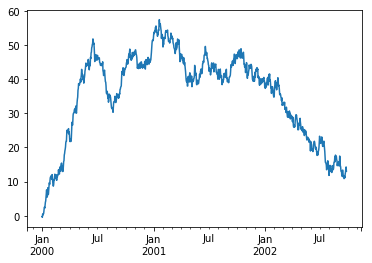

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

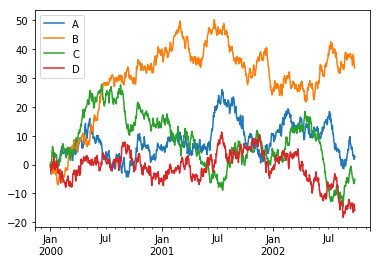

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [101]:
df.to_csv('data/foo.csv')

从一个csv文件读入

In [102]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.547915,0.758504,-0.791553,-0.014276
1,2000-01-02,-1.478652,-1.824863,0.001416,-1.067864
2,2000-01-03,-3.070727,-1.655967,-0.551411,-2.188238
3,2000-01-04,-3.317105,-1.810778,0.354000,-1.995760
4,2000-01-05,-2.822308,-2.757077,1.210057,-1.250592
5,2000-01-06,-2.223865,-3.256931,3.658672,-1.232510
6,2000-01-07,-0.559411,-2.842820,4.860993,-0.418853
7,2000-01-08,-0.524812,-2.748762,6.280814,0.170616
8,2000-01-09,0.204528,-0.865022,5.560456,0.875871
9,2000-01-10,0.688895,-1.704024,5.226062,0.444483


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [103]:
df.to_hdf('data/foo.h5', 'df')

从一个HDF5 Store读入

In [104]:
pd.read_hdf('data/foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.547915,0.758504,-0.791553,-0.014276
2000-01-02,-1.478652,-1.824863,0.001416,-1.067864
2000-01-03,-3.070727,-1.655967,-0.551411,-2.188238
2000-01-04,-3.317105,-1.810778,0.354000,-1.995760
2000-01-05,-2.822308,-2.757077,1.210057,-1.250592
2000-01-06,-2.223865,-3.256931,3.658672,-1.232510
2000-01-07,-0.559411,-2.842820,4.860993,-0.418853
2000-01-08,-0.524812,-2.748762,6.280814,0.170616
2000-01-09,0.204528,-0.865022,5.560456,0.875871
2000-01-10,0.688895,-1.704024,5.226062,0.444483


## Excel

MS Excel的读写

写入一个Excel文件

In [105]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

从一个excel文件读入

In [106]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.547915,0.758504,-0.791553,-0.014276
2000-01-02,-1.478652,-1.824863,0.001416,-1.067864
2000-01-03,-3.070727,-1.655967,-0.551411,-2.188238
2000-01-04,-3.317105,-1.810778,0.354000,-1.995760
2000-01-05,-2.822308,-2.757077,1.210057,-1.250592
2000-01-06,-2.223865,-3.256931,3.658672,-1.232510
2000-01-07,-0.559411,-2.842820,4.860993,-0.418853
2000-01-08,-0.524812,-2.748762,6.280814,0.170616
2000-01-09,0.204528,-0.865022,5.560456,0.875871
2000-01-10,0.688895,-1.704024,5.226062,0.444483
